<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


Import pandas module


In [1]:
import pandas as pd

Import matplotlib


In [2]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [3]:
import requests
from tqdm.notebook import tqdm
from urllib.parse import urlparse

In [4]:
# Set URL & parse filename
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
# Parse the URL
data_name = urlparse(dataset_url).path.strip('/').split('/')[-1]

In [5]:
# Read data
df = pd.read_csv(data_name)

# Display the first few rows
df.head(n=3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
duplicates = df[df.duplicated(keep=False)]
print("Number of duplicates:", duplicates.shape[0])

Number of duplicates: 40


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
duplicates2 = df[df.duplicated(keep=False, subset=['MainBranch', 'Employment', 'RemoteWork'])]

In [8]:
dup2_grouped = duplicates2.groupby(['MainBranch', 'Employment', 'RemoteWork'])

In [9]:
pd.set_option('display.max_rows', None)

In [20]:
# Calculate proportion of identical values for each column in each group
identical_counts = {}
for col in df.columns:
    if col not in ['MainBranch', 'Employment', 'RemoteWork']:
        identical_counts[col] = dup2_grouped[col].nunique().eq(1).mean()

# Sort to see which columns are most frequently identical
identical_summary = pd.Series(identical_counts).sort_values(ascending=True)
print(identical_summary)

ResponseId                        0.000000
CodingActivities                  0.003135
BuyNewTool                        0.021944
YearsCodePro                      0.025078
TechEndorse                       0.025078
Currency                          0.031348
LearnCode                         0.037618
YearsCode                         0.040752
LanguageHaveWorkedWith            0.043887
DevType                           0.056426
Country                           0.059561
OrgSize                           0.062696
SOHow                             0.062696
LanguageWantToWorkWith            0.068966
OpSysPersonal use                 0.068966
NEWCollabToolsHaveWorkedWith      0.068966
EdLevel                           0.072100
OfficeStackSyncHaveWorkedWith     0.078370
PurchaseInfluence                 0.087774
ToolsTechHaveWorkedWith           0.094044
Age                               0.094044
LanguageAdmired                   0.097179
SOComm                            0.097179
BuildvsBuy 

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [11]:
# Get counts for 'Country' and 'Employment'
country_dups = duplicates2['Country'].value_counts()
employment_dups = duplicates2['Employment'].value_counts()

In [12]:
import seaborn as sns

top_employments = pd.DataFrame(employment_dups.head(10)).reset_index()

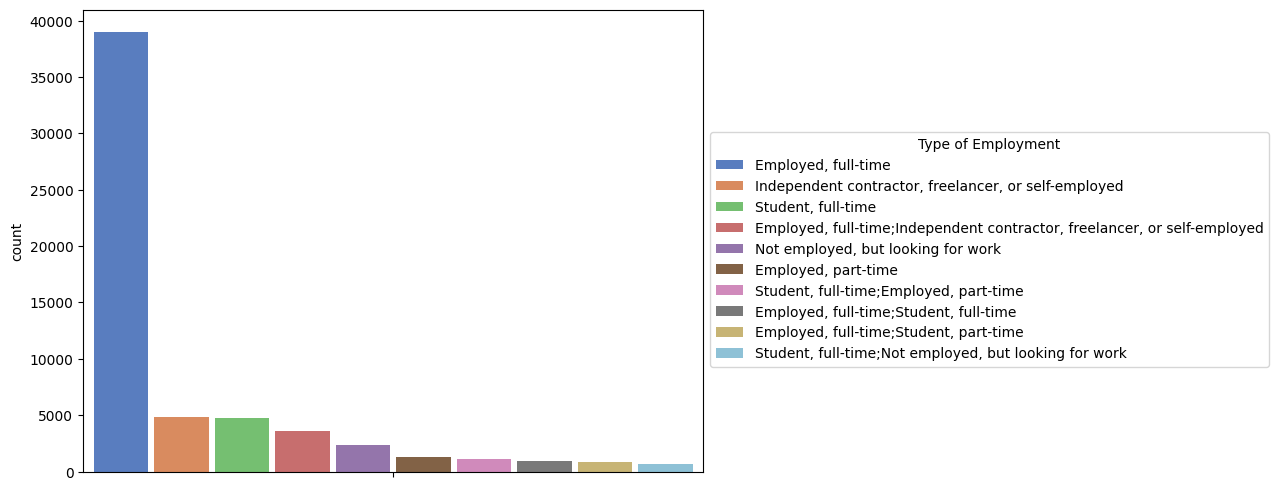

In [13]:
# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(data=top_employments, hue='Employment', y='count', palette='muted', gap=0.1)
plt.xlim(-0.41, 0.41)
plt.legend(title='Type of Employment', bbox_to_anchor=(1,0.75))
plt.show()

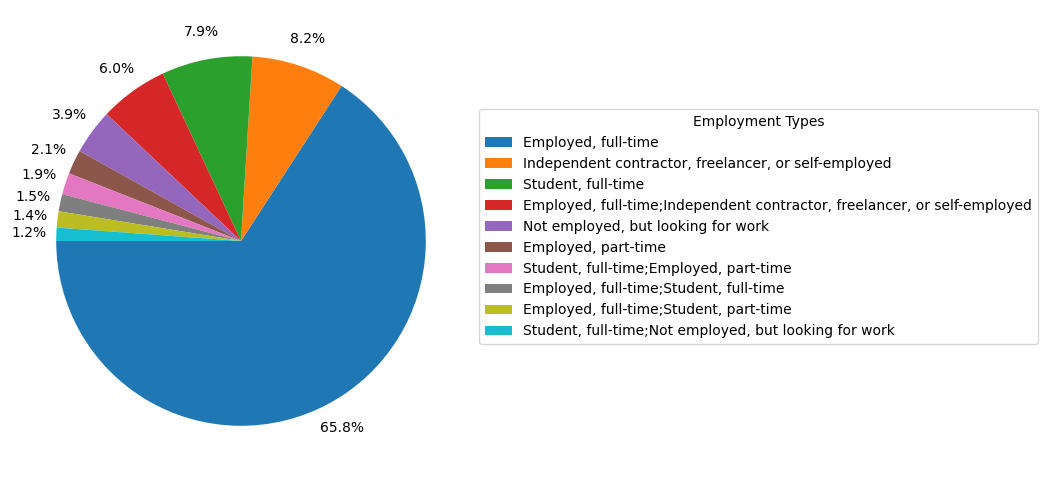

In [14]:
# Pie Chart
plt.figure(figsize=(8,6))
plt.pie(data=top_employments, x='count', autopct='%1.1f%%', startangle=180, pctdistance=1.15)
plt.legend(top_employments['Employment'], title='Employment Types', bbox_to_anchor=(1,0.8))
plt.show()

In [19]:
top_countries = pd.DataFrame(country_dups.head(10)).reset_index()
# top_countries

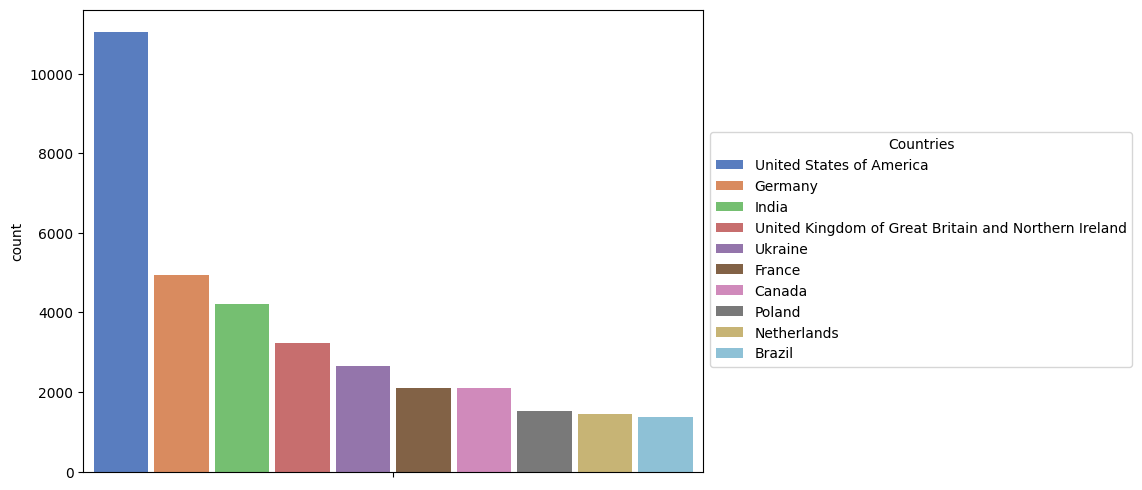

In [16]:
# Bar plot
plt.figure(figsize=(8,6))
sns.barplot(data=top_countries, hue='Country', y='count', palette='muted', gap=0.1)
plt.xlim(-0.41, 0.41)
plt.legend(title='Countries', bbox_to_anchor=(1,0.75))
plt.show()

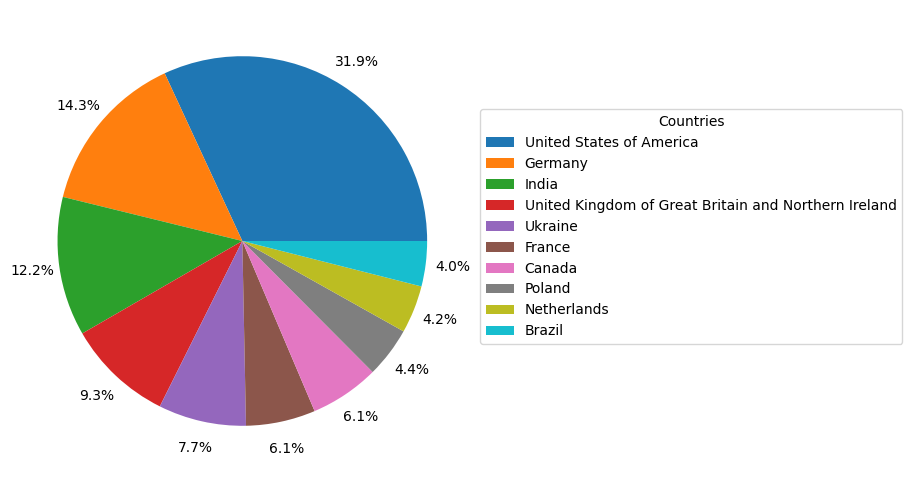

In [17]:
# Pie Chart
plt.figure(figsize=(8,6))
plt.pie(data=top_countries, x='count', autopct='%1.1f%%', pctdistance=1.15)
plt.legend(top_countries['Country'], title='Countries', bbox_to_anchor=(1,0.8))
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [27]:
crit_cols=['MainBranch', 'Employment', 'RemoteWork']
df_clean = df.drop_duplicates(subset=crit_cols, keep='first')

In [28]:
print(df.shape[0])
print(df_clean.shape[0])
print(df.shape[0] - df_clean.shape[0])

65457
561
64896


## Verify and Document Duplicate Removal Process


### Task 5: Documentation

#### 1. Document the process of identifying and removing duplicates.

##### Reasoning

In Task 2, we identified `MainBranch`, `Employment`, and `RemoteWork` as the combination of columns that defines the uniqueness of each record. Any rows sharing the same values for all three columns were considered duplicates, regardless of differences in other fields.

##### Process

Duplicates were removed using `DataFrame.drop_duplicates()` with the `subset` parameter set to these three columns, keeping only the first occurrence of each unique combination:

```python
df_unique = df.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork'], keep='first')
```

##### Outcome

The dataset was reduced from 65457 rows to 561 rows, removing 64896 duplicates according to the subset of `MainBranch`, `Employment`, and `RemoteWork`.

#### 2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.

##### Reasoning

In Task 2, I investigated which columns could define the uniqueness of each record by:

1. Finding potential duplicate groups based on candidate columns (`MainBranch`, `Employment`, `RemoteWork`).
2. Measuring how often other columns were identical within each duplicate group using `.nunique().eq(1).mean()`.

The `identical_summary` results showed that when rows shared the same values for `MainBranch`, `Employment`, and `RemoteWork`, most other columns in those groups had very high variation (proportions well below 1), indicating these three columns were not trivially identical for all other attributes — but they were the most stable combination for identifying the same “type” of respondent.

These columns:

- Represent high-level, core demographic descriptors (developer type, employment type, remote work arrangement).
- Had a small number of unique combinations ($561$) compared to the dataset size, meaning many rows repeated these combinations.
- Provided a reasonable balance: narrow enough to catch genuine duplicates, broad enough not to remove too much distinct information (as verified in the earlier grouping analysis).

Therefore, this subset was chosen to strategically remove duplicates in Task 4, keeping only one record per unique combination of `MainBranch`, `Employment`, and `RemoteWork`.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
